# Loan Approval Prediction Using Machine Learning

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

## Reading Data

In [5]:
df = pd.read_csv(r"C:\Users\GAURAV PATIL\Desktop\DDD\Project\Loan Approval Prediction\Data\Loan Data.csv", encoding = 'unicode_escape')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.shape

(614, 13)

## Data Cleaning and Manupulation

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

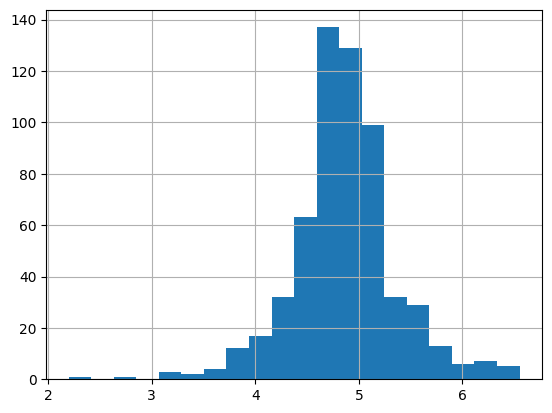

In [11]:
df['Loan_Amount_log'] = np.log(df['LoanAmount'])
df['Loan_Amount_log'].hist(bins = 20)

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Loan_Amount_log      22
dtype: int64

<Axes: >

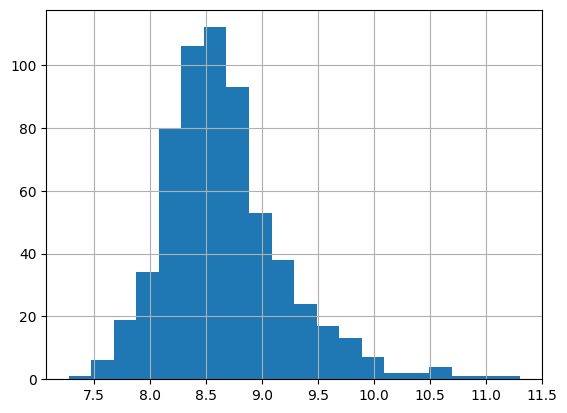

In [17]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income_log'] = np.log(df['Total_Income'])
df['Total_Income_log'].hist(bins = 20)

In [19]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_log = df.Loan_Amount_log.fillna(df.Loan_Amount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loan_Amount_log      0
Total_Income         0
Total_Income_log     0
dtype: int64

In [42]:
x = df.iloc[ : , np.r_[1:5,9:11.13:15]].values # np.r is a easy way to make arrays qucikly

y = df.iloc[ : , 12]

Division of people on based of Gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

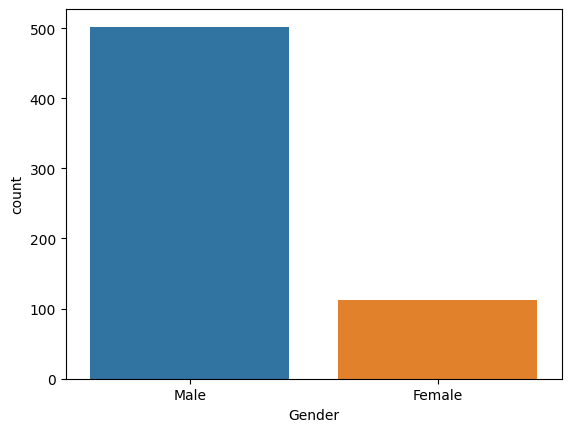

In [29]:
print('Division of people who take loans on based of Gender')

print(df.Gender.value_counts())

sns.countplot(x = 'Gender', data = df, hue = 'Gender')

Division of people who take loans on based of Gender
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

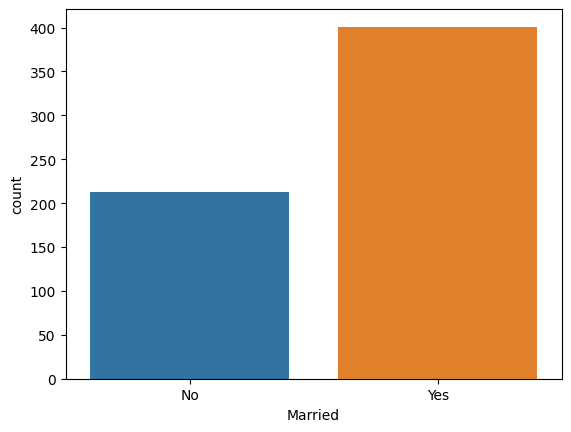

In [30]:
print('Division of people who take loans on based of Marital Status')

print(df.Married.value_counts())

sns.countplot(x = 'Married', data = df, hue = 'Married')

Division of people who take loans on based of Employment Status
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

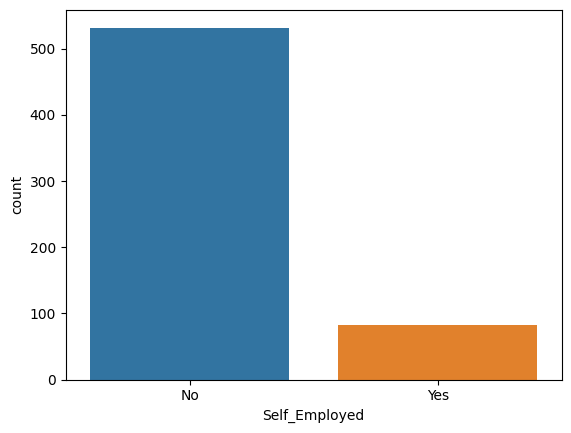

In [33]:
print('Division of people who take loans on based of Employment Status')

print(df.Self_Employed.value_counts())

sns.countplot(x = 'Self_Employed', data = df, hue = 'Self_Employed')

Division of people who take loans on based of Dependency
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

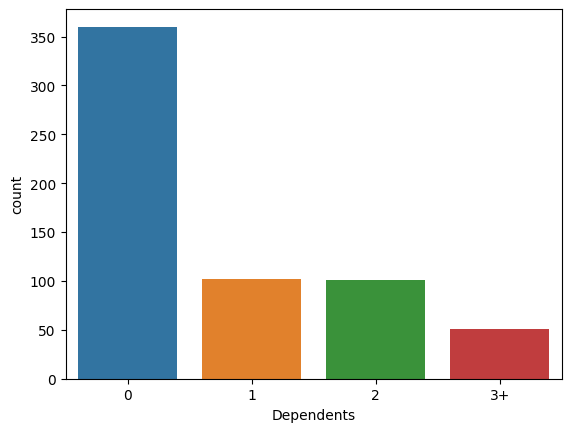

In [34]:
print('Division of people who take loans on based of Dependency')

print(df.Dependents.value_counts())

sns.countplot(x = 'Dependents', data = df, hue = 'Dependents')

Division of people who take loans on based of Credit_History
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

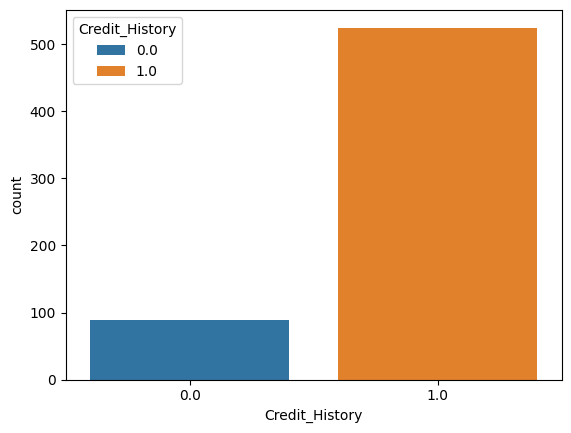

In [36]:
print('Division of people who take loans on based of Credit_History')

print(df.Credit_History.value_counts())

sns.countplot(x = 'Credit_History', data = df, hue = 'Credit_History')

## Data Training

In [46]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train, y_test = train_test_split(x , y ,test_size = 0.2, random_state =0 )

from sklearn.preprocessing import LabelEncoder

Labelencoder_x = LabelEncoder()

In [79]:
for i in range(0,5):
    X_train[:,i] = Labelencoder_x.fit_transform(X_train[:,i])

X_train

array([[1, 1, 0, 0, 7],
       [1, 0, 1, 0, 7],
       [1, 1, 0, 0, 7],
       ...,
       [1, 1, 3, 0, 7],
       [1, 1, 0, 1, 7],
       [0, 1, 0, 0, 7]], dtype=object)

In [80]:
Labelencoder_y = LabelEncoder()

y_train = Labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [82]:
for i in range(0,5):
    X_test[:,i] = Labelencoder_x.fit_transform(X_test[:,i])


In [84]:
Labelencoder_y = LabelEncoder()

y_test = Labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [86]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

## Accuracy Predictions

### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [89]:
from sklearn import metrics

y_pred = rf_classifier.predict(X_test)

print('Accuracy of RandomForest Classifier is ', metrics.accuracy_score(y_pred, y_test))

y_pred

Accuracy of RandomForest Classifier is  0.7235772357723578


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

### Gaussian Navie Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

GaussianNB()

In [93]:
y_pred = nb_classifier.predict(X_test)

print('Accuracy of Naive Bayes is ', metrics.accuracy_score(y_pred,y_test))

Accuracy of Naive Bayes is  0.7154471544715447


### Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
y_pred = dt_classifier.predict(X_test)

print('Accuracy of Decision Tree Classifier is ',metrics.accuracy_score(y_pred, y_test))

Accuracy of Decision Tree Classifier is  0.7398373983739838


### KNeighbors Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier

kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
y_pred = kn_classifier.predict(X_test)

print('Accuracy using KNeighbors is ',metrics.accuracy_score(y_pred, y_test))

Accuracy using KNeighbors is  0.7073170731707317
